# Customer Churn Prediction Using ANN

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Vignesh Arjun/Desktop/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA:

In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
for col in df:
    print(df[col].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Lengt

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- From the above informations, we can conclude that there are no missing values present in the dataset.
- There are 13 independent featues and 1 dependent feature present, out of which three are categorical variables and the rest are numerical.

###### Let us find the churn rate using a pie chart.

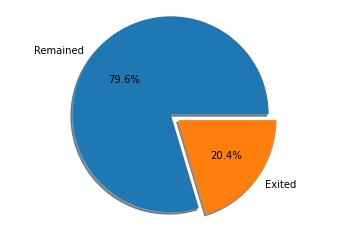

In [7]:
labels = 'Remained','Exited'
x = df.Exited.value_counts()
explode = (.1,0)

plt.pie(x,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

##### From the above chart we can understand that more than 20% of the customers quit. 
##### Let us have a look at the deciding factors of the churn rate.

<AxesSubplot:xlabel='Geography', ylabel='count'>

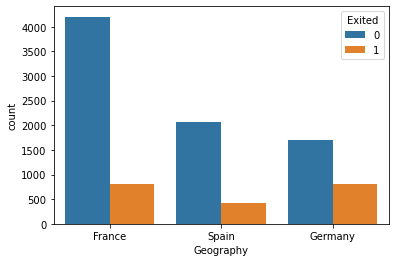

In [8]:
sns.countplot(x='Geography',hue='Exited',data=df,)

#### Churn rate is higher in Germany with almost 50% of churn rate, followed by Spain and France with around 25%.

<AxesSubplot:xlabel='Gender', ylabel='count'>

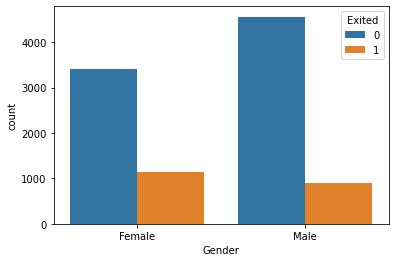

In [9]:
sns.countplot(x='Gender',hue='Exited',data=df)

#### Based on Gender, we can see that Female customers tend to quit more than Male customers.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

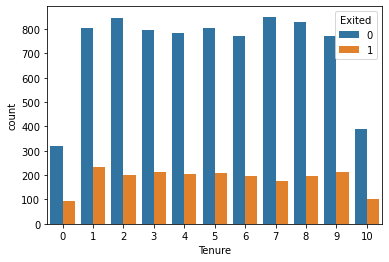

In [10]:
sns.countplot(x='Tenure',hue='Exited',data=df)

#### Churn rate are spread more or less equally based on the Tenure of the Customers.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

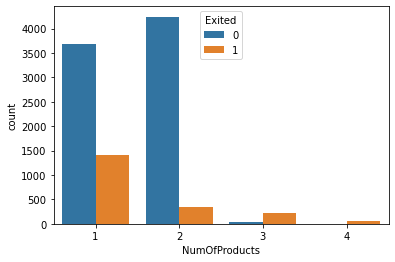

In [11]:
sns.countplot(x='NumOfProducts',hue='Exited',data=df)

### Churn rate based on number of products used by the Customers
###### - More than 30% Customers using a single product are churned
###### - Around 10% Customers using two products are churned
###### - More than 80% of the Customers are churned who are using 3 products
###### - Mostly all the Customers using four products are churned 

Hence, the number of products used by the customers have a great impact on the churn rate, which can be well determined if we have the data of the subscription amount levied on by the bank for those products compared to their competitors

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

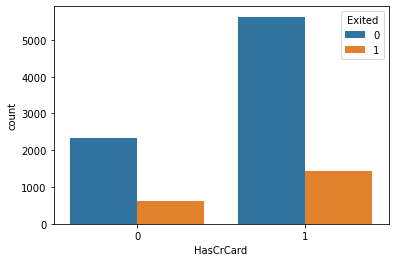

In [12]:
sns.countplot(x='HasCrCard',hue='Exited',data=df)

### Churn rate based on the Customers possession of Credit Card
###### Only 15% of the customers without a credit card are churned, whereas, more than 20% of the customers with a credit card are churned.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

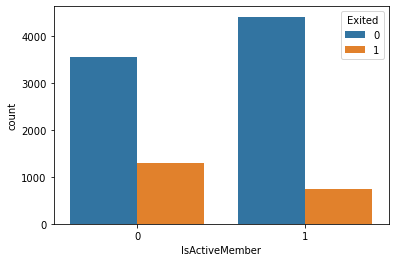

In [13]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

#### - More than 35% of the Inactive members are churned, while less than 10% of the active members are churned.

<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

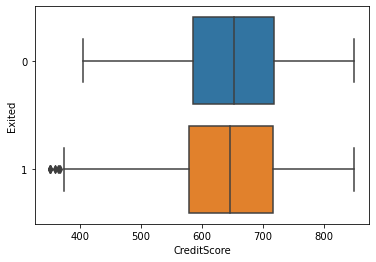

In [14]:
sns.boxplot(x='CreditScore',y='Exited',data=df,orient='h')

#### Credit Score does not have a huge impact on the Churn Rate

<AxesSubplot:xlabel='Age', ylabel='Exited'>

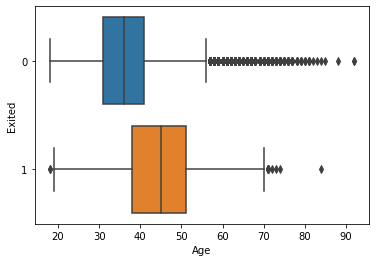

In [15]:
sns.boxplot(x='Age',y='Exited',data=df,orient='h')

### Customers between the age group of 30 and 40 are churned more than the customers from other age.

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

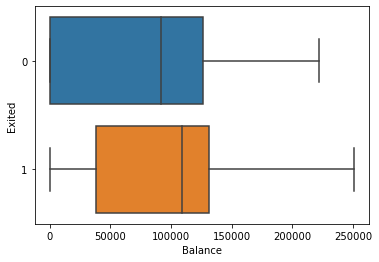

In [16]:
sns.boxplot(x='Balance',y='Exited',data=df,orient='h')

#### The customers with a huge amount of balance are leaving the bank, which should be reduced to safeguard the revenue generated by those customers. 
#### Also, around 25% of the Customers remained in the bank are maintaining very low balance in their account. 

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

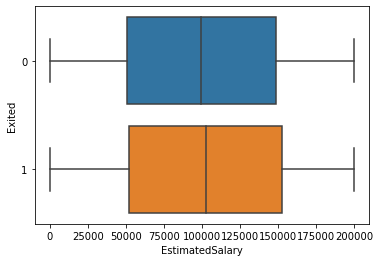

In [17]:
sns.boxplot(x='EstimatedSalary',y='Exited',data=df,orient='h')

#### The estimated salary of the Cusotmers does not have a great impact on the Churn rate, even though the churn rate is comparatively a bit high based on the salary

## Multicollinearity between the variables

<AxesSubplot:>

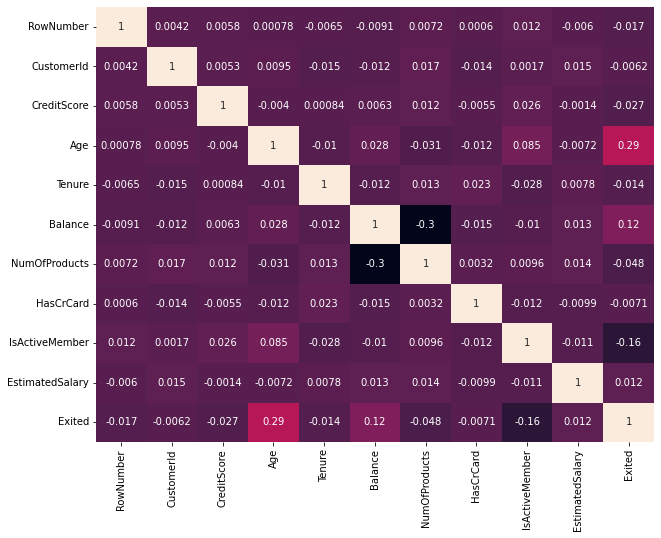

In [18]:
df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cbar=False,annot=True)

##### There is no collinearity present between the variables. Hence we can take all the columns into account based on Multi-collinearity.

### FEATURE SELECTION FOR MODEL BUILDING:

###### From the given dataset, the columns RowNumber, CustomerId and Surname are irrelevant features that can impact the model acccuracy negatively. So, we are dropping those columns for model building.

In [19]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Splitting the input variables and output variable to train and test the model
X=df.iloc[:,:10]
y=df.iloc[:,10]

In [21]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [22]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
## Creating dummy variables for the Categorical features
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [24]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [25]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [26]:
## Concatenating the dummy variables with the original dataset:
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
## Dropping the variables for which the dummies are created:
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [28]:
## Applying train and test split on the processed dataset:

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=11)

In [30]:
## Scaling the train and test data to fit it into range:
scale = StandardScaler()

In [31]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Building the ANN Model:

In [32]:
ann = Sequential()

In [33]:
## Adding first input layer and the hidden layer
ann.add(Dense(11,activation='relu'))

In [34]:
## Adding the second hidden layer
ann.add(Dense(7,activation='relu'))

In [35]:
## Adding the third hidden layer
ann.add(Dense(6,activation='relu'))

In [36]:
## Adding the output layer
ann.add(Dense(1,activation='sigmoid'))

In [37]:
## Model Compilation
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
#Early Stopping for epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [39]:
model_hist = ann.fit(X_train,y_train,validation_split=0.3,epochs=150,callbacks=early_stopping)

Epoch 1/150
165/165 [==============================] - 1s 3ms/step - loss: 0.5407 - accuracy: 0.7899 - val_loss: 0.4861 - val_accuracy: 0.7893
Epoch 2/150
165/165 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8027 - val_loss: 0.4405 - val_accuracy: 0.7942
Epoch 3/150
165/165 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8097 - val_loss: 0.4218 - val_accuracy: 0.8080
Epoch 4/150
165/165 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8152 - val_loss: 0.4088 - val_accuracy: 0.8156
Epoch 5/150
165/165 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8240 - val_loss: 0.3983 - val_accuracy: 0.8209
Epoch 6/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8301 - val_loss: 0.3860 - val_accuracy: 0.8302
Epoch 7/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8410 - val_loss: 0.3737 - val_accuracy: 0.8387

Epoch 58/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8676 - val_loss: 0.3309 - val_accuracy: 0.8644
Epoch 59/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8674 - val_loss: 0.3258 - val_accuracy: 0.8644
Epoch 60/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8684 - val_loss: 0.3255 - val_accuracy: 0.8653
Epoch 61/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8686 - val_loss: 0.3264 - val_accuracy: 0.8627
Epoch 62/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8690 - val_loss: 0.3249 - val_accuracy: 0.8644
Epoch 63/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8684 - val_loss: 0.3246 - val_accuracy: 0.8649
Epoch 64/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8701 - val_loss: 0.3256 - val_accuracy:

In [40]:
## List of the data present in the model history
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

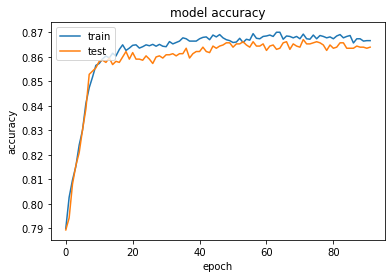

In [41]:
#Visualization of history for accuracy:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

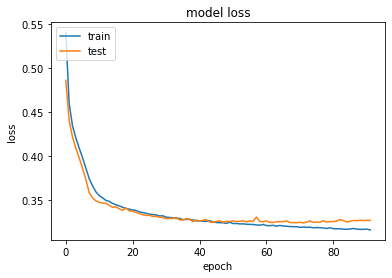

In [42]:
## Visualising the model history for loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
## Predicting and evaluating the model
y_pred = ann.predict(X_test)
y_pred = y_pred >= 0.5

79/79 [==============================] - 0s 1ms/step


In [44]:
## Creating Confusion Matrix to find the accuracy
accuracy = confusion_matrix(y_pred,y_test)
accuracy

array([[1877,  263],
       [ 104,  256]], dtype=int64)

In [45]:
acc_score = accuracy_score(y_pred,y_test)
print('The accuracy score for the ANN model built is {0:.2f}'.format(acc_score))

The accuracy score for the ANN model built is 0.85
